In [44]:
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import numpy as np

import json

with open('new_data.json', 'r') as inp:
    data = json.load(inp)

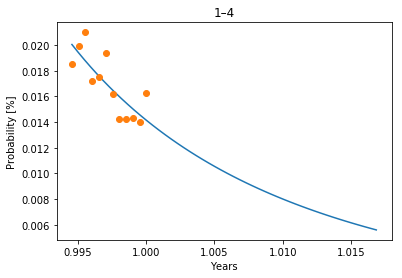

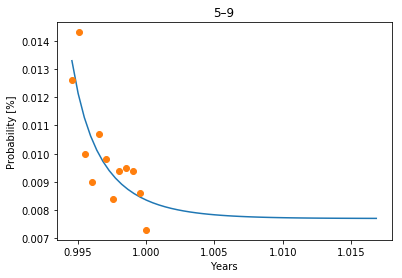

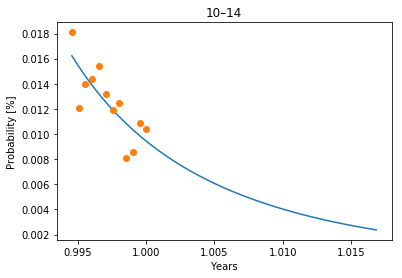

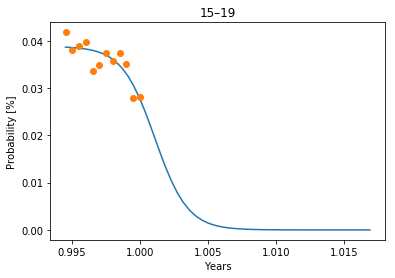

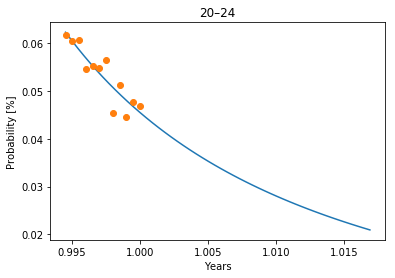

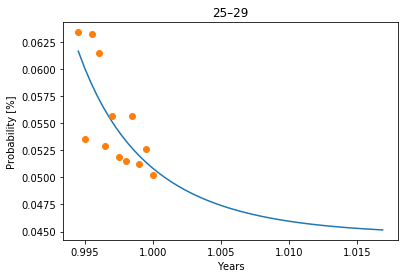

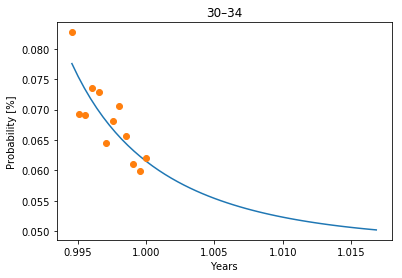

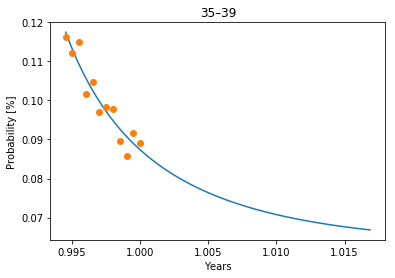

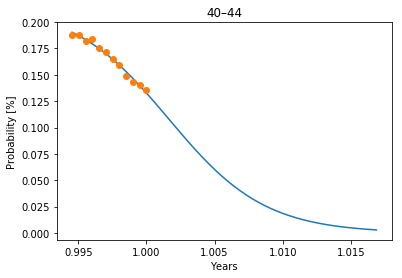

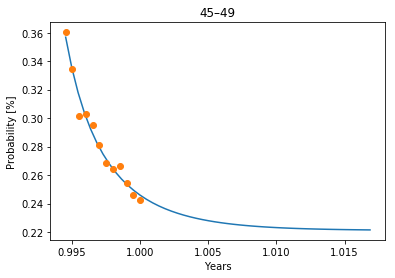

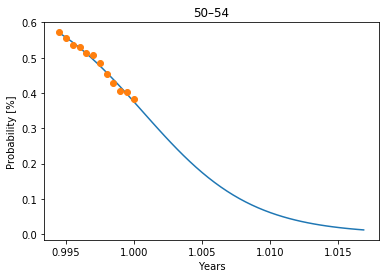

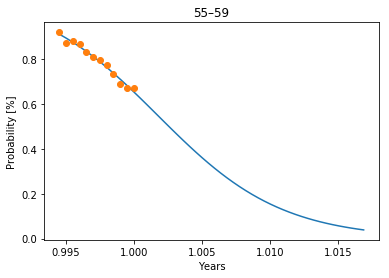

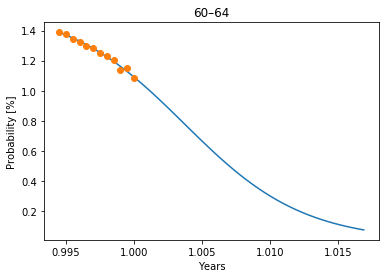

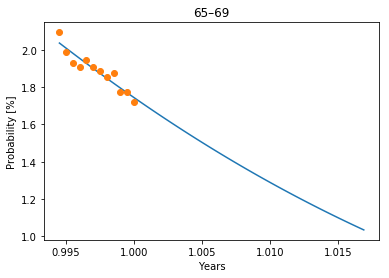

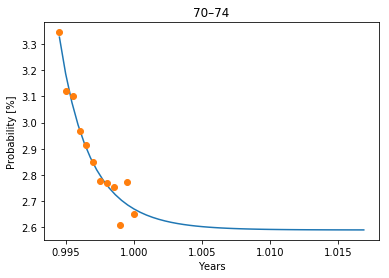

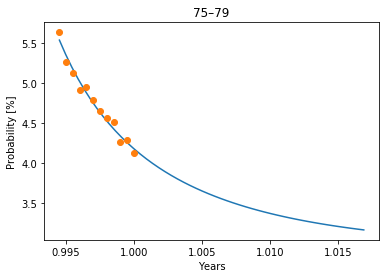

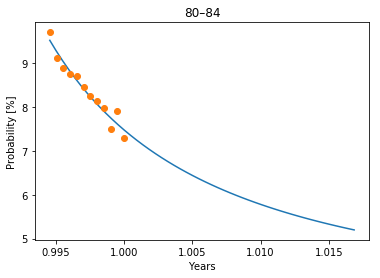

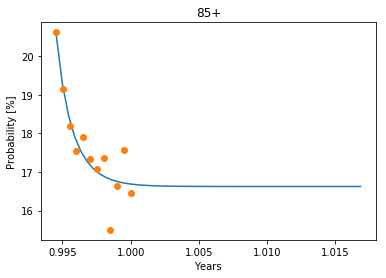

In [13]:
def model_down(val, x):
    return np.absolute(val[0] / (x**val[1] + val[2]))

def model_up(val, x):
    return np.absolute(val[0] + val[1] * x**val[2])

def func_down(val, x, y):
    return model_down(val, x) - y

def func_up(val, x, y):
    return model_up(val, x) - y


x_o = np.array(data['years'][-12:])
x = x_o / x_o.max()

ress = []

for part, name in zip(data['data'], data['names']):
    if name == '0':
        continue
    
    y = np.array(part[-12:])
    y = y / 10**3

    x0 = np.array([1, 1, 1])

    res = least_squares(func_down, x0, args=(x, y))
    ress.append(res)
    xnew = np.linspace(x.min(), 2050/x_o.max(), 50)

    #celkovo *= model(res.x, 2016/x_o.max())
    #amp.append(model(res.x, 2017/x_o.max()))
    #print(model(res.x, 2050/x_o.max()), '%')
    plt.xlabel('Years')
    plt.ylabel('Probability [%]')
    plt.title(name)
    plt.plot(xnew, model_down(res.x, xnew), '-', x , y , 'o')
    #plt.ylim(0,0.1)
    plt.show()

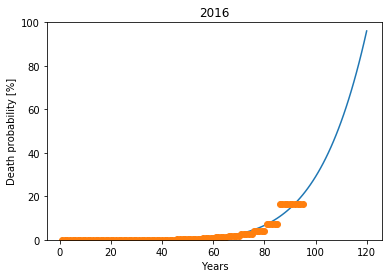

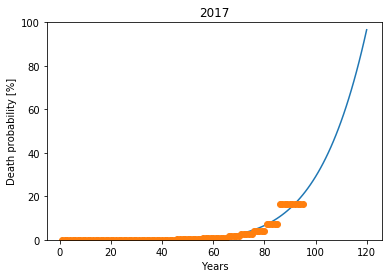

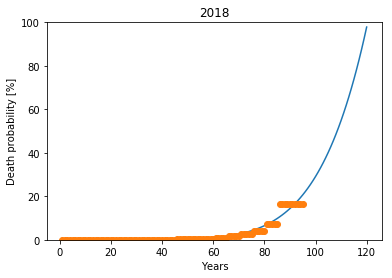

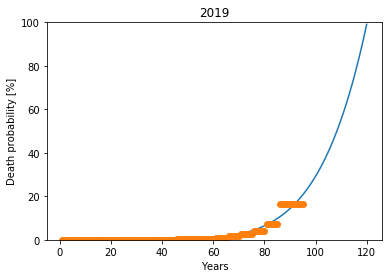

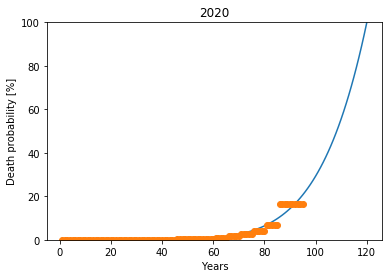

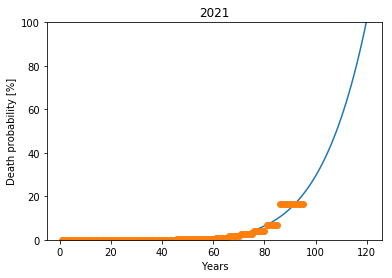

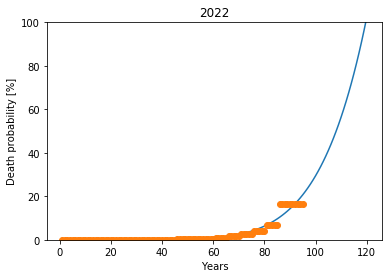

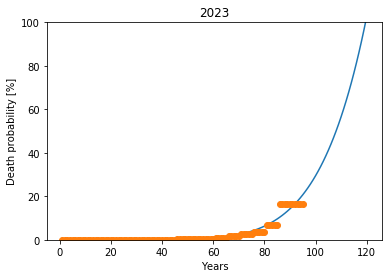

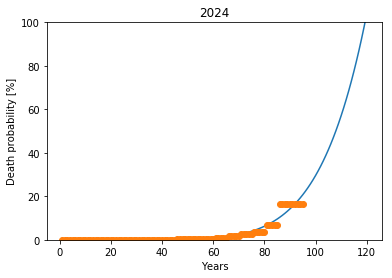

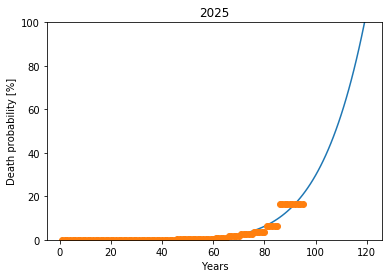

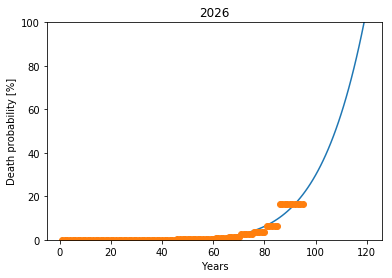

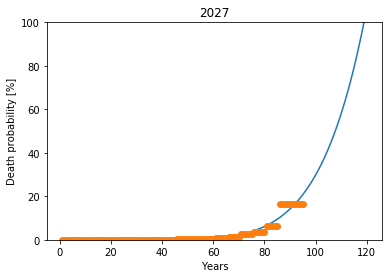

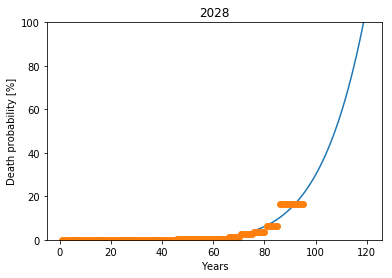

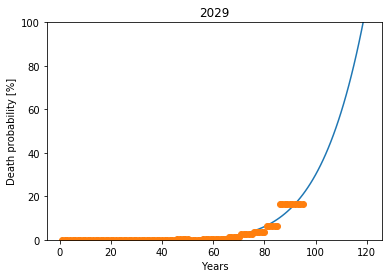

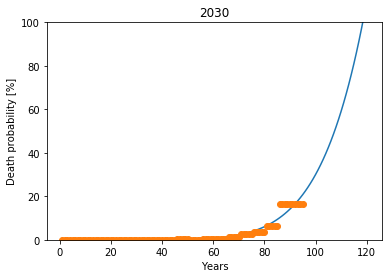

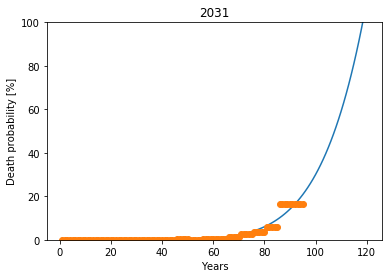

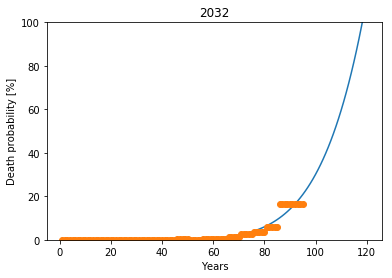

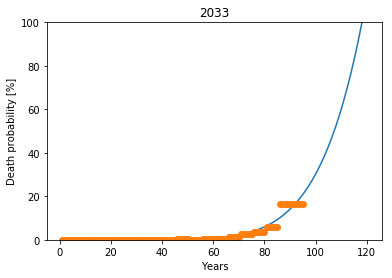

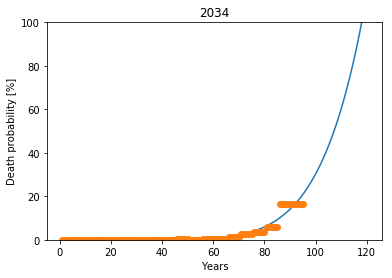

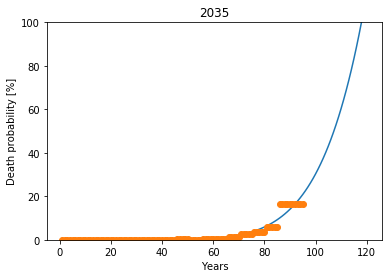

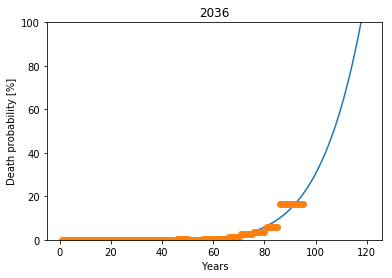

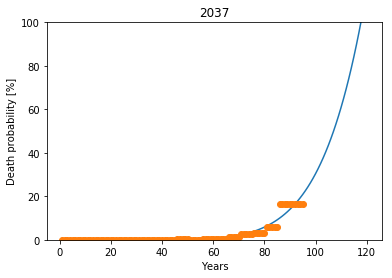

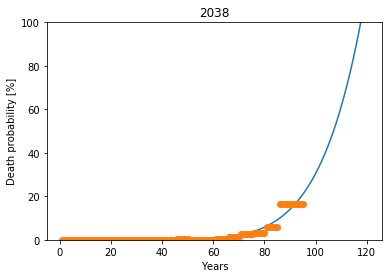

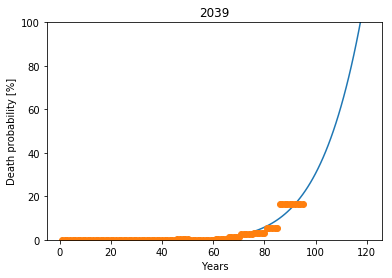

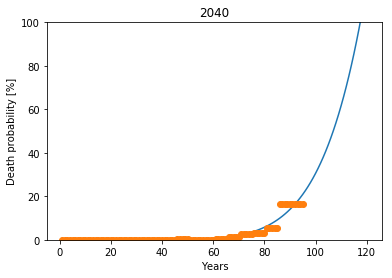

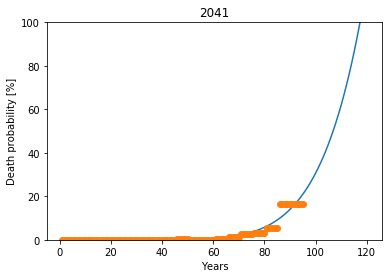

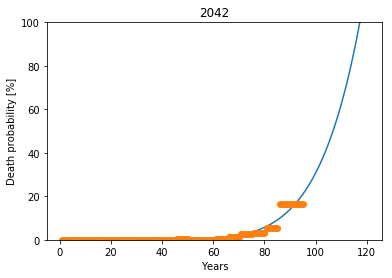

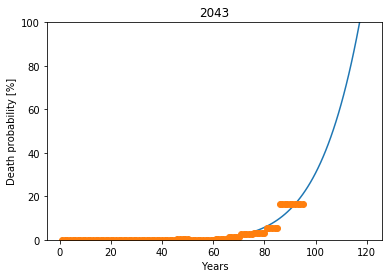

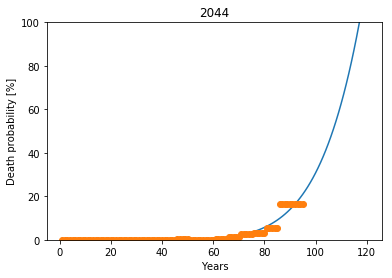

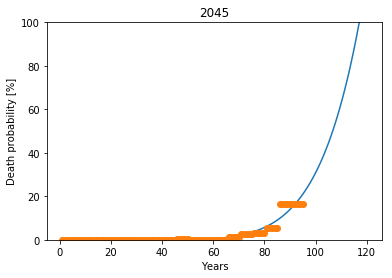

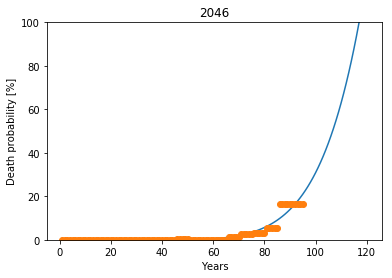

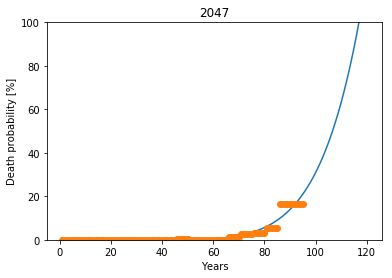

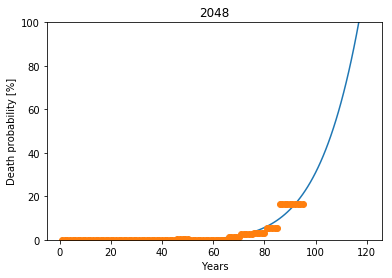

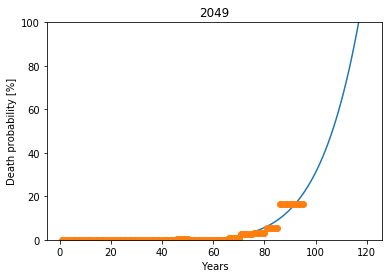

In [35]:
for year in range(2016, 2050):
    values = []
    for res in ress:
        val = model_down(res.x, year/2016)
        values += [val] * 5
    values += [values[-1]] * 5
    
    y = np.array(values)
    x = np.array(range(1, len(values) + 1))

    x0 = np.array([1, 1, 1])
    res = least_squares(func_up, x0,args=(x, y))
    
    xnew = np.linspace(1, 120, 120)
    plt.title(year)
    plt.xlabel('Years')
    plt.ylabel('Death probability [%]')
    plt.plot(xnew, model_up(res.x, xnew), '-', x , y , 'o')
    plt.ylim(0,100)
    plt.show()